In [1]:
# Librerias a importar
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [2]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#1. Carga y Exploración de Datos:
Cargar los datasets

In [3]:
# Importar DataFrame Train
path = '/content/drive/MyDrive/Colab Notebooks/Modelos Regresión/dataset/titanic train.csv'
data_train = pd.read_csv(path, sep=",")

In [4]:
# Importar DataFrame Test
path = '/content/drive/MyDrive/Colab Notebooks/Modelos Regresión/dataset/titanic test.csv'
data_test = pd.read_csv(path, sep=",")

Realizar una exploración inicial para entender la estructura del dataset

In [5]:
# Exploración de DataFrame Train
print(data_train.head())
print(data_train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
# Exploración de datos DataFrame Test
print(data_test.head())
print(data_test.describe())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000 

Identificar valores faltantes

In [7]:
# Hacemos copia de los DataFrames
df=data_train.copy()
df_test=data_test.copy()

# Convertimos a minúsculas y quitamos espacios en blanco de las columnas
df.columns = df.columns.str.lower().str.strip()
df_test.columns = df_test.columns.str.lower().str.strip()
# Convertimos a minúsculas y quitamos espacios en blanco de las columnas de tipo objeto en DataFrame Train
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.lower().str.strip()
# Convertimos a minúsculas y quitamos espacios en blanco de las columnas de tipo objeto en DataFrame Test
for col in df_test.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.lower().str.strip()

In [8]:
# Verificar por datos nulos en DataFrame Train
datos_null = df.isnull()
if datos_null.any().any():
    print("Cantidad de datos nulos por columna en Dataframe Train:\n", datos_null.sum())
else:
    print("No se encontró datos nulos")

# Verificar por datos nulos en DataFrame Test
datos_null = df_test.isnull()
if datos_null.any().any():
    print("\nCantidad de datos nulos por columna en DataFrame Test:\n", datos_null.sum())
else:
    print("No se encontró datos nulos")

Cantidad de datos nulos por columna en Dataframe Train:
 passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Cantidad de datos nulos por columna en DataFrame Test:
 passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64


Verificar tipos de datos en columnas

In [9]:
print(df.info())
# Resultado: Tipos de Datos en columnas correctos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Identificar valores únicos

In [10]:
# Verificamos valores únicos en las columas
for col in df.columns:
    print(f"\nDatos en la columa: '{col}':")
    print(df[col].unique())


Datos en la columa: 'passengerid':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

Identificar inconsistencia en datos categóricos

In [11]:
# No se identificaron datos con inconsistencia

Identificar valores duplicados

In [12]:
# Buscar datos duplicados
datos_duplicados = df.duplicated()
if datos_duplicados.any():
    print("Cantidad de datos duplicados: ", datos_duplicados.sum())
else:
    print("No se encontró datos duplicados")

No se encontró datos duplicados


Identificar valores outliers

In [13]:
# Función para identificar valores outliers usando el método IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identificar outliers en columna numéricas
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# Excluir la columna 'outcome'
if 'outcome' in numerical_columns:
  numerical_columns.remove('outcome')

print("\nIdentificar outliers usando el método IQR:")
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers en columna '{col}':")
        print(outliers[[col]])
        print("-" * 30)


Identificar outliers usando el método IQR:
Outliers en columna 'age':
      age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0
------------------------------
Outliers en columna 'sibsp':
     sibsp
7        3
16       4
24       3
27       3
50       4
59       5
63       3
68       4
71       5
85       3
88       3
119      4
159      8
164      4
171      4
176      3
180      8
182      4
201      8
229      3
233      4
261      4
266      4
278      4
324      8
341      3
374      3
386      5
409      3
480      5
485      3
541      4
542      4
634      3
642      3
683      5
686      4
726      3
787      4
792      8
813      4
819      3
824      4
846      8
850      4
863      8
------------------------------
Outliers en columna 'parch':
     parch
7        1
8        2
10       1
13       5
16       1
..     ...
871      1
879      1
880      1
885      5
888      2

[213 rows x 1 columns]
----------------

#2. Limpieza y Preprocesamiento:

Eliminar columnas innecesarias

In [14]:
# Eliminar la columna 'cabin' ya que tiene un alto porcentaje de valores nulos
df = df.drop(['cabin', 'passengerid'], axis=1, )
df_test = df_test.drop('cabin', axis=1)

# Verificar las columnas restantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


Manejar inconsistencia en datos categóricos

In [15]:
# No hay datos con inconsistencia en dataset

Manejo de tipo de datos en columnas

In [16]:
# Los datos en cada columna son correctos

Eliminar duplicados

In [17]:
# No se encontraron datos duplicados

In [18]:
# Verificar las columnas restantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


Manejo de valores faltantes

In [19]:
# Seleccionar colunmas numéricas y categóricas
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Manejar valores faltantes en DataFrame Train
for col in categorical_features:
    if df[col].isnull().any():
        # Si es categórica, rellenar con la moda
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

for col in numerical_cols:
    if df[col].isnull().any():
        # Si es numérica, rellenar con el promedio
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# Verificar si aún hay valores nulos después de la imputación
print("\nCantidad de datos nulos por columna después de imputación en DataFrame Train:\n", df.isnull().sum())

print("\nVerificar las primeras filas del DataFrame después de la limpieza:")
print(df.head())


Cantidad de datos nulos por columna después de imputación en DataFrame Train:
 survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Verificar las primeras filas del DataFrame después de la limpieza:
   survived  pclass                                               name  \
0         0       3                            braund, mr. owen harris   
1         1       1  cumings, mrs. john bradley (florence briggs th...   
2         1       3                             heikkinen, miss. laina   
3         1       1       futrelle, mrs. jacques heath (lily may peel)   
4         0       3                           allen, mr. william henry   

      sex   age  sibsp  parch            ticket     fare embarked  
0    male  22.0      1      0         a/5 21171   7.2500        s  
1  female  38.0      1      0          pc 17599  71.2833        c  
2  female  26.0      0      0  ston/o2. 3101282   

In [20]:
# Seleccionar colunmas numéricas y categóricas
numerical_cols_test = df_test.select_dtypes(include=np.number).columns.tolist()
categorical_features_test = df_test.select_dtypes(include='object').columns.tolist()
# Excluir columna 'passengerid'
cols_to_exclude_test = ['passengerid']
numerical_cols_test = [col for col in numerical_cols_test if col not in cols_to_exclude_test]

# Manejar valores faltantes en DataFrame Train
for col in categorical_features_test:
    if df_test[col].isnull().any():
        # Si es categórica, rellenar con la moda
        mode_value_test = df_test[col].mode()[0]
        df_test[col] = df_test[col].fillna(mode_value_test)

for col in numerical_cols_test:
    if df_test[col].isnull().any():
        # Si es numérica, rellenar con el promedio
        mean_value_test = df_test[col].mean()
        df_test[col] = df_test[col].fillna(mean_value_test)

# Verificar si aún hay valores nulos después de la imputación
print("\nCantidad de datos nulos por columna después de imputación en DataFrame Test:\n", df_test.isnull().sum())

print("\nVerificar las primeras filas del DataFrame después de la limpieza:")
print(df_test.head())


Cantidad de datos nulos por columna después de imputación en DataFrame Test:
 passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

Verificar las primeras filas del DataFrame después de la limpieza:
   passengerid  pclass                                          name     sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    age  sibsp  parch   ticket     fare embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6

Manejar valores outliers

In [21]:
# No se manejarán los valores outliers por considerlos parte de la realidad y datos categóricos

##2. Exploración de Datos:
Crear visualizaciones univariadas y multivariadas

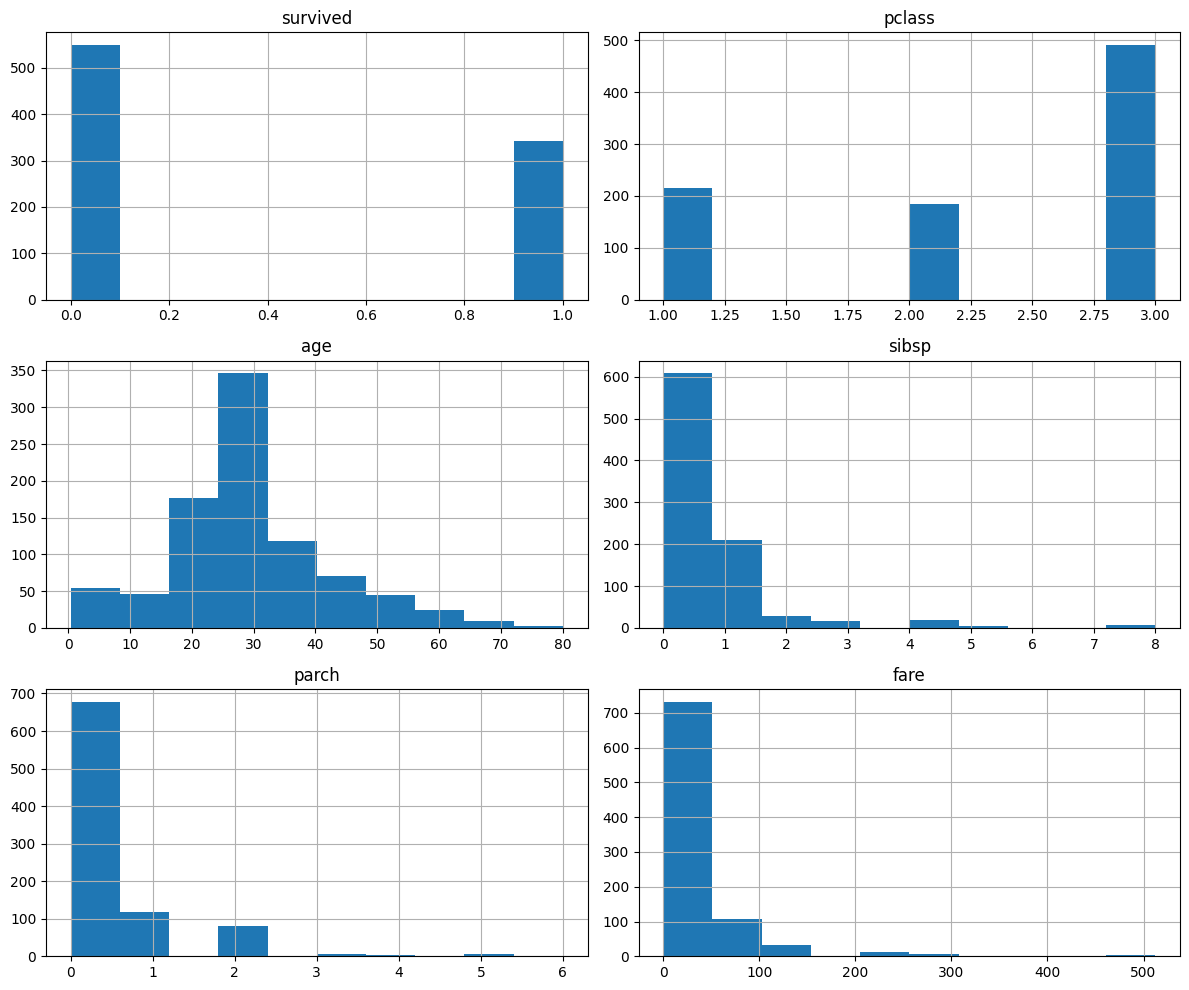

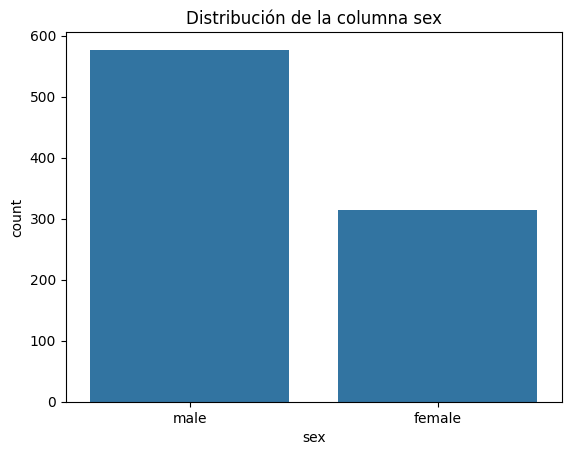

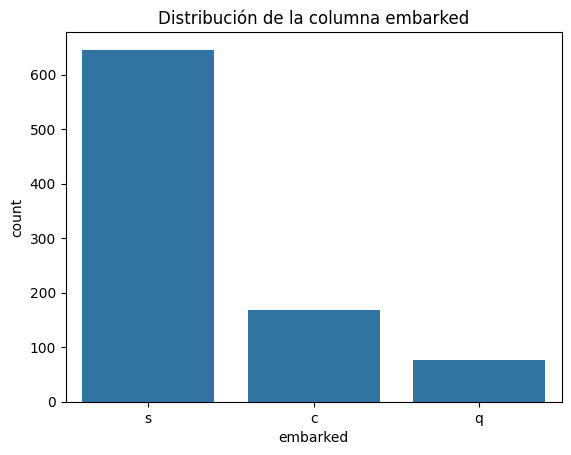

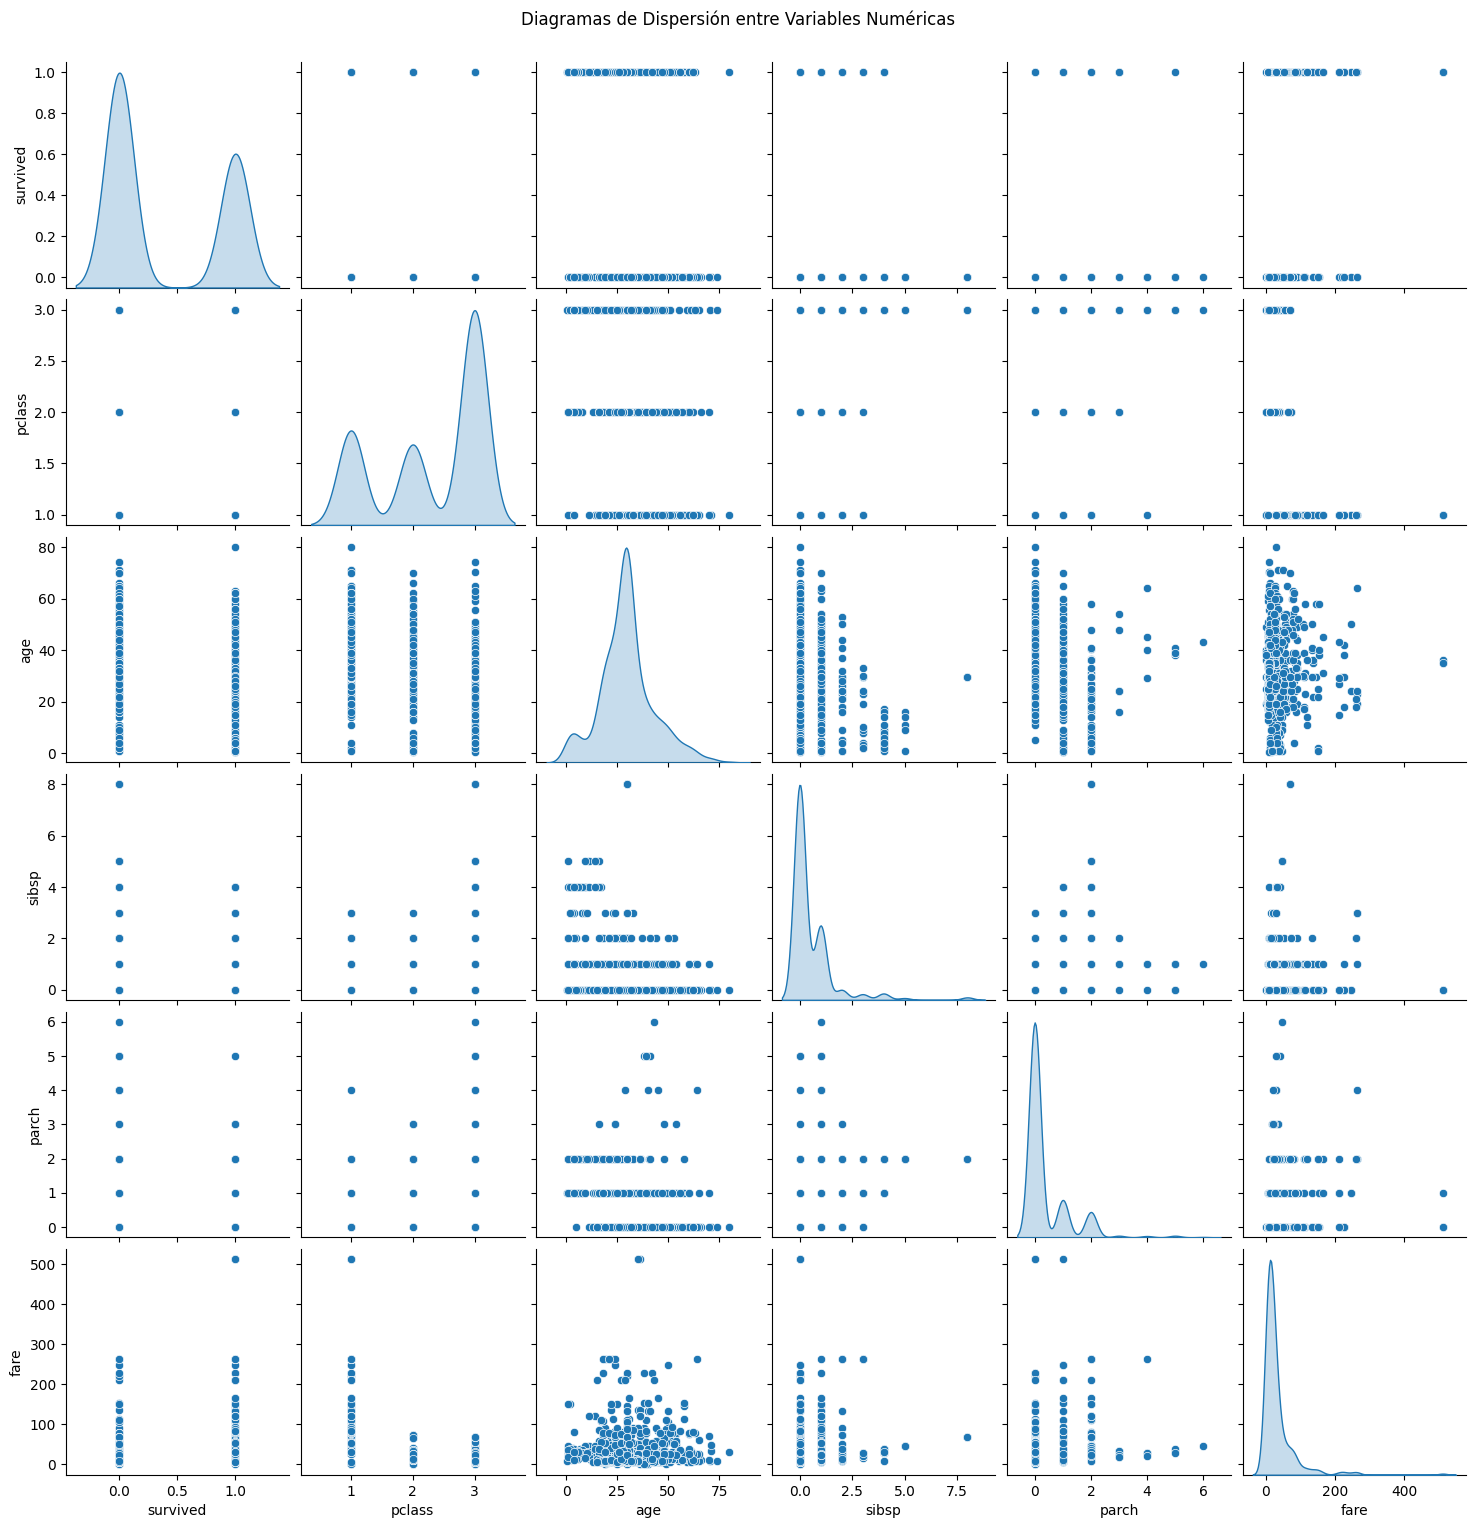

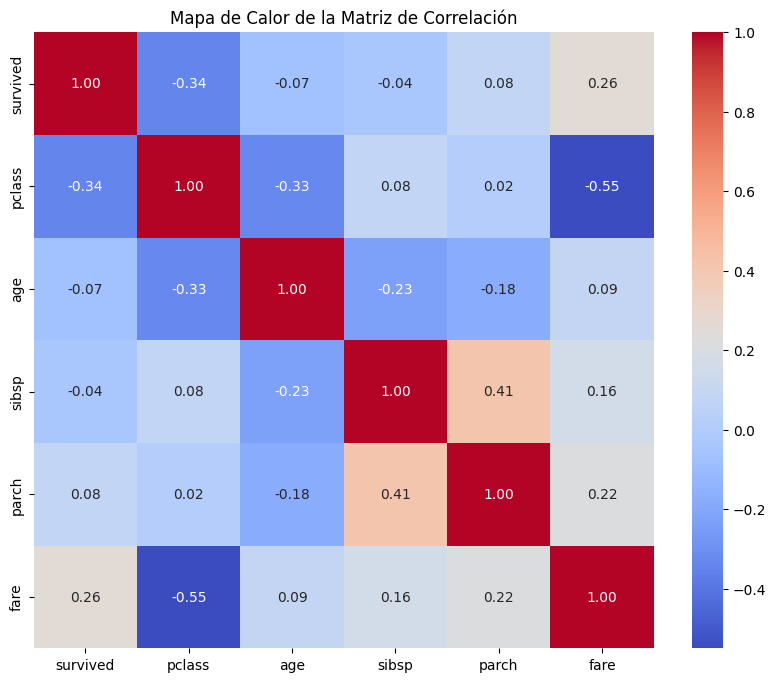

In [22]:
# Excluir columnas 'passengerid', 'name', 'ticket' para plotting, por no aportar para las visualizaciones
cols_to_exclude = ['passengerid', 'name', 'ticket']

# Histograma para variables numéricas
numerical_cols_hist = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_hist = [col for col in numerical_cols_hist if col not in cols_to_exclude]
df[numerical_cols_hist].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Gráficos de barras para variables categóricas
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols_bar = [col for col in categorical_cols if col not in cols_to_exclude]
for col in categorical_cols_bar:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de la columna {col}')
    plt.show()

# Diagramas de dispersión para relaciones entre pares de variables numéricas
numerical_cols_for_pairplot = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_pairplot = [col for col in numerical_cols_for_pairplot if col not in cols_to_exclude]

sns.pairplot(df[numerical_cols_for_pairplot], diag_kind='kde')
plt.suptitle('Diagramas de Dispersión entre Variables Numéricas', y=1.02)
plt.show()

# Mapa de calor para la matriz de correlación de variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols_for_pairplot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Calcular estadísticas descriptivas

In [23]:
print("\nEstadísticas descriptivas detalladas por columna:")
print("\nResumen general de estadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas detalladas por columna:

Resumen general de estadísticas descriptivas:
          survived      pclass                 name   sex         age  \
count   891.000000  891.000000                  891   891  891.000000   
unique         NaN         NaN                  891     2         NaN   
top            NaN         NaN  dooley, mr. patrick  male         NaN   
freq           NaN         NaN                    1   577         NaN   
mean      0.383838    2.308642                  NaN   NaN   29.699118   
std       0.486592    0.836071                  NaN   NaN   13.002015   
min       0.000000    1.000000                  NaN   NaN    0.420000   
25%       0.000000    2.000000                  NaN   NaN   22.000000   
50%       0.000000    3.000000                  NaN   NaN   29.699118   
75%       1.000000    3.000000                  NaN   NaN   35.000000   
max       1.000000    3.000000                  NaN   NaN   80.000000   

             sibsp       

#3. Implementación de Modelos:

Uso de ColumnTransformer y Pipeline

In [24]:
# Definir features (X) and target (y) para los datos de entrenamiento
X_train = df.drop('survived', axis=1)
y_train = df['survived']

# Definir features para los datos de test, excluyendo 'passengerid'
X_test = df_test.drop('passengerid', axis=1)

# Identificar las columnas numéricas y categóricas
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

# Crear transformadores para cada subconjunto de columnas
# Escalar las características numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputar los valores categóricos con la moda y one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
],
    remainder='passthrough'
)

# Aplicar el preprocesamiento para la data de entrenamiento y prueba
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print("Conjunto de datos de entrenamiento procesados:", X_train_processed.shape)
print("Conjunto de datos de prueba procesados:", X_test_processed.shape)

Conjunto de datos de entrenamiento procesados: (891, 1582)
Conjunto de datos de prueba procesados: (418, 1582)


## Modelo Regresión Logística

Mejor hiperparámetro para el modelo Regresión Logística: {'classifier__C': 10, 'classifier__penalty': 'l1'}

Cross-validation Accuracy para el mejor modelo de Regresión Logística: [0.84357542 0.82022472 0.83707865 0.79213483 0.83146067]
Promedio CV Accuracy: 0.8248948590797814

Métricas de evaluación para el mejor modelo Regresión Logística:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000

Matriz de confusión:
[[549   0]
 [  0 342]]


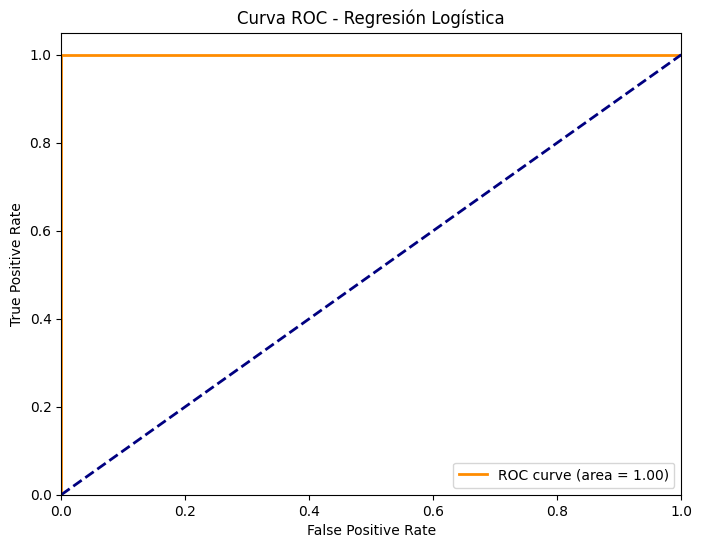

In [25]:
# Pipeline y preprocesamiento del modelo Regresión Logística
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

# Definir la grilla de hiperparámetros a tunear
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Configurar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_lr.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejor hiperparámetro para el modelo Regresión Logística:", grid_search_lr.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba usando cross-validation
cv_scores_lr = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy para el mejor modelo de Regresión Logística:", cv_scores_lr)
print("Promedio CV Accuracy:", cv_scores_lr.mean())

# Hacer predicciones con datos de entrenamiento usando el mejor modelo de GridSearchCV
y_train_pred_lr = grid_search_lr.best_estimator_.predict(X_train)
y_train_pred_proba_lr = grid_search_lr.best_estimator_.predict_proba(X_train)[:, 1]


# Calcular métricas de evaluación
accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
precision_lr = precision_score(y_train, y_train_pred_lr)
recall_lr = recall_score(y_train, y_train_pred_lr)
f1_lr = f1_score(y_train, y_train_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_train, y_train_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

print("\nMétricas de evaluación para el mejor modelo Regresión Logística:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_train, y_train_pred_lr)
print("\nMatriz de confusión:")
print(cm_lr)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# Hacer predicciones con datos de prueba, usando el mejor modelo de GridSearchCV
y_test_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
y_test_pred_proba_lr = grid_search_lr.best_estimator_.predict_proba(X_test)[:, 1]

# Guardar DataFrame para la competición
# submission_df = pd.DataFrame({'PassengerId': data_test['passengerid'], 'Survived': y_test_pred_lr})
# submission_df.to_csv('logistic_regression_submission.csv', index=False)

##Modelo K-Nearest Neighbors (KNN)


Entrenando el modelo KNN con búsqueda de hiperparámetros...
Mejores hiperparámetros para KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}

Cross-validation Accuracy para el mejor modelo de KNN: [0.79888268 0.78089888 0.84831461 0.82022472 0.84269663]
Promedio CV Accuracy: 0.8182035026049839

Métricas de evaluación para el mejor modelo KNN:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000

Matriz de Confusión:
[[549   0]
 [  0 342]]


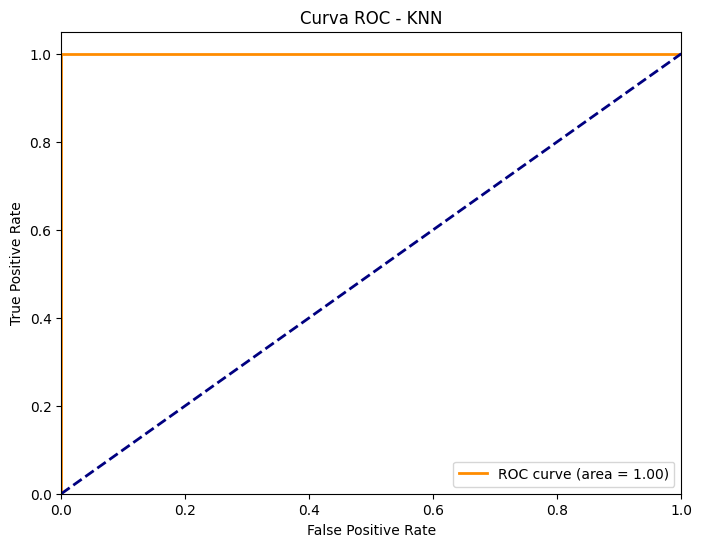

In [26]:
# Pipeline y preprocesamiento del modelo KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

# Definir los hiperparámetros a tunear para KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
print("\nEntrenando el modelo KNN con búsqueda de hiperparámetros...")
grid_search_knn.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para KNN:", grid_search_knn.best_params_)

# Evaluar el mejor modelo en el conjunto de entrenamiento usando cross-validation
cv_scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy para el mejor modelo de KNN:", cv_scores_knn)
print("Promedio CV Accuracy:", cv_scores_knn.mean())

# Hacer predicciones con datos de entrenamiento usando el mejor modelo de GridSearchCV
y_train_pred_knn = grid_search_knn.best_estimator_.predict(X_train)
y_train_pred_proba_knn = grid_search_knn.best_estimator_.predict_proba(X_train)[:, 1]

# Calcular métricas de evaluación
accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
precision_knn = precision_score(y_train, y_train_pred_knn)
recall_knn = recall_score(y_train, y_train_pred_knn)
f1_knn = f1_score(y_train, y_train_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_train, y_train_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

print("\nMétricas de evaluación para el mejor modelo KNN:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")

# Matriz de confusión
cm_knn = confusion_matrix(y_train, y_train_pred_knn)
print("\nMatriz de Confusión:")
print(cm_knn)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.show()

# Hacer predicciones con datos de prueba, usando el mejor modelo de GridSearchCV
y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
y_test_pred_proba_knn = grid_search_knn.best_estimator_.predict_proba(X_test)[:, 1]

# Guardar DataFrame para la competición
# submission_df = pd.DataFrame({'PassengerId': data_test['passengerid'], 'Survived': y_test_pred_knn})
# submission_df.to_csv('knn_submission.csv', index=False)

##Modelo Árbol de Decisión

Mejores hiperparámetros para Árbol de Decisión: {'classifier__criterion': 'gini', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Cross-validation Accuracy para el mejor modelo de Árbol de Decisión: [0.79888268 0.81460674 0.87640449 0.81460674 0.86516854]
Promedio CV Accuracy: 0.8339338396836355

Métricas de evaluación para el mejor modelo Árbol de Decisión:
Accuracy: 0.9798
Precision: 1.0000
Recall: 0.9474
F1-score: 0.9730
ROC-AUC: 0.9817

Matriz de Confusión:
[[549   0]
 [ 18 324]]


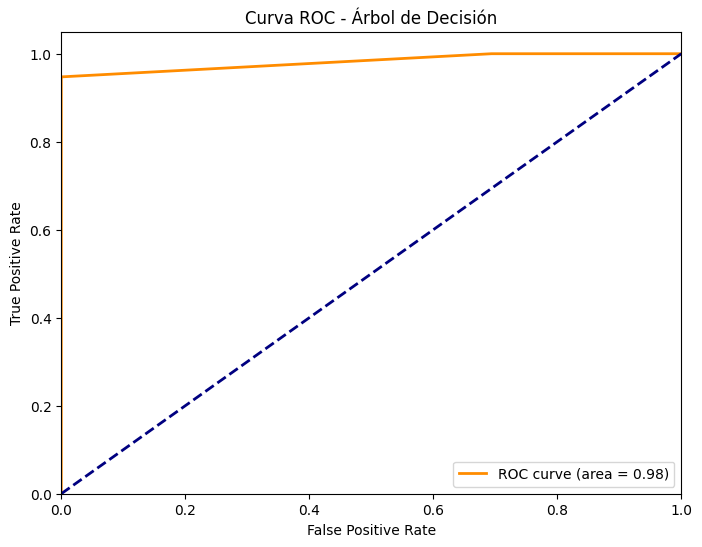

In [27]:
# Pipeline y preprocesamiento del modelo Decision Tree
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier(random_state=42))])

# Definir los hiperparámetros a tunear para Decision Tree
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_dt.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Árbol de Decisión:", grid_search_dt.best_params_)

# Evaluar el mejor modelo en el conjunto de entrenamiento usando cross-validation
cv_scores_dt = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy para el mejor modelo de Árbol de Decisión:", cv_scores_dt)
print("Promedio CV Accuracy:", cv_scores_dt.mean())

# Hacer predicciones con datos de entrenamiento usando el mejor modelo de GridSearchCV
y_train_pred_dt = grid_search_dt.best_estimator_.predict(X_train)
y_train_pred_proba_dt = grid_search_dt.best_estimator_.predict_proba(X_train)[:, 1]

# Calcular métricas de evaluación
accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
precision_dt = precision_score(y_train, y_train_pred_dt)
recall_dt = recall_score(y_train, y_train_pred_dt)
f1_dt = f1_score(y_train, y_train_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_train, y_train_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

print("\nMétricas de evaluación para el mejor modelo Árbol de Decisión:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")

# Matriz de confusión
cm_dt = confusion_matrix(y_train, y_train_pred_dt)
print("\nMatriz de Confusión:")
print(cm_dt)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

# Hacer predicciones con datos de prueba, usando el mejor modelo de GridSearchCV
y_test_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
y_test_pred_proba_dt = grid_search_dt.best_estimator_.predict_proba(X_test)[:, 1]

# Guardar DataFrame para la competición
# submission_df = pd.DataFrame({'PassengerId': data_test['passengerid'], 'Survived': y_test_pred_dt})
# submission_df.to_csv('decision_tree_submission.csv', index=False)

##Modelo de XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparámetros para XGBoost: {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 50, 'classifier__reg_alpha': 0.5, 'classifier__reg_lambda': 0.1, 'classifier__subsample': 1.0}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Cross-validation Accuracy para el mejor modelo de XGBoost: [0.81564246 0.83146067 0.88202247 0.83146067 0.85955056]
Promedio CV Accuracy: 0.8440273680246062

Métricas de evaluación para el mejor modelo XGBoost:
Accuracy: 0.9349
Precision: 0.9410
Recall: 0.8860
F1-score: 0.9127
ROC-AUC: 0.9839

Matriz de Confusión:
[[530  19]
 [ 39 303]]


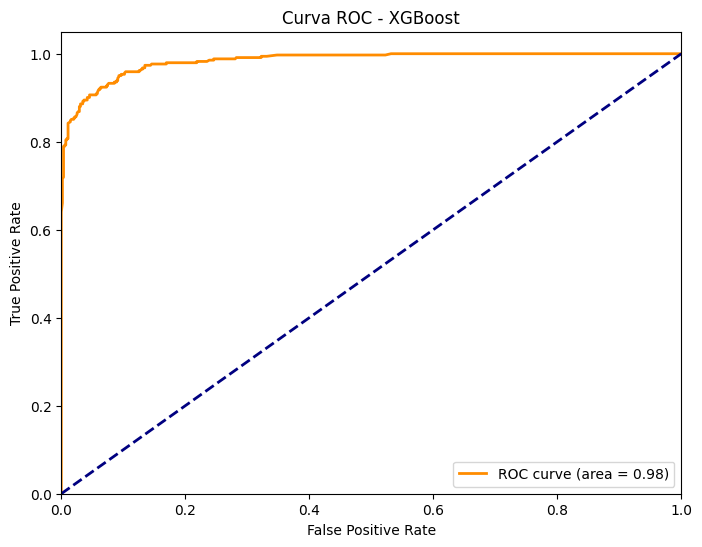

In [28]:
# Pipeline y preprocesamiento del modelo XGBoost
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])

# Definir los hiperparámetros a tunear para XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [0, 0.1, 0.5]
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_xgb.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)

# Evaluar el mejor modelo en el conjunto de entrenamiento usando cross-validation
cv_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy para el mejor modelo de XGBoost:", cv_scores_xgb)
print("Promedio CV Accuracy:", cv_scores_xgb.mean())

# Hacer predicciones con datos de entrenamiento usando el mejor modelo de GridSearchCV
y_train_pred_xgb = grid_search_xgb.best_estimator_.predict(X_train)
y_train_pred_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_train)[:, 1]

# Calcular métricas de evaluación
accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
precision_xgb = precision_score(y_train, y_train_pred_xgb)
recall_xgb = recall_score(y_train, y_train_pred_xgb)
f1_xgb = f1_score(y_train, y_train_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, y_train_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print("\nMétricas de evaluación para el mejor modelo XGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")

# Matriz de confusión
cm_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print("\nMatriz de Confusión:")
print(cm_xgb)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Hacer predicciones con datos de prueba, usando el mejor modelo de GridSearchCV
y_test_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
y_test_pred_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]

# Guardar DataFrame para la competición
# submission_df = pd.DataFrame({'PassengerId': data_test['passengerid'], 'Survived': y_test_pred_xgb})
# submission_df.to_csv('xgboost_submission.csv', index=False)

##Modelo LightGBM

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Métricas de evaluación para el mejor modelo LightGBM:
Accuracy: 0.9181
Precision: 0.9216
Recall: 0.8596
F1-score: 0.8896
ROC-AUC: 0.9764

Matriz de Confusión:
[[524  25]
 [ 48 294]]


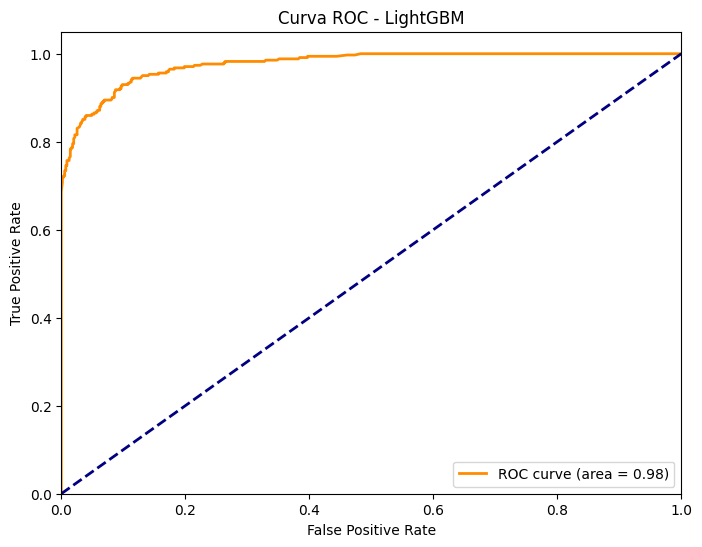

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [29]:
# Pipeline y preprocesamiento del modelo LightGBM
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LGBMClassifier(random_state=42))])

# Definir los hiperparámetros a tunear para LightGBM
param_grid_lgbm = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__num_leaves': [10, 20, 31],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__min_child_samples': [20, 30, 40],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [0, 0.1, 0.5]
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_lgbm.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para LightGBM:", grid_search_lgbm.best_params_)

# Evaluar el mejor modelo en el conjunto de entrenamiento usando cross-validation
cv_scores_lgbm = cross_val_score(grid_search_lgbm.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy para el mejor modelo de LightGBM:", cv_scores_lgbm)
print("Promedio CV Accuracy:", cv_scores_lgbm.mean())

# Hacer predicciones con datos de entrenamiento usando el mejor modelo de GridSearchCV
y_train_pred_lgbm = grid_search_lgbm.best_estimator_.predict(X_train)
y_train_pred_proba_lgbm = grid_search_lgbm.best_estimator_.predict_proba(X_train)[:, 1]

# Calcular métricas de evaluación
accuracy_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
precision_lgbm = precision_score(y_train, y_train_pred_lgbm)
recall_lgbm = recall_score(y_train, y_train_pred_lgbm)
f1_lgbm = f1_score(y_train, y_train_pred_lgbm)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_train, y_train_pred_proba_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

print("\nMétricas de evaluación para el mejor modelo LightGBM:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1-score: {f1_lgbm:.4f}")
print(f"ROC-AUC: {roc_auc_lgbm:.4f}")

# Matriz de confusión
cm_lgbm = confusion_matrix(y_train, y_train_pred_lgbm)
print("\nMatriz de Confusión:")
print(cm_lgbm)

# Gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LightGBM')
plt.legend(loc="lower right")
plt.show()

# Hacer predicciones con datos de prueba, usando el mejor modelo de GridSearchCV
y_test_pred_lgbm = grid_search_lgbm.best_estimator_.predict(X_test)
y_test_pred_proba_lgbm = grid_search_lgbm.best_estimator_.predict_proba(X_test)[:, 1]

# Guardar DataFrame para la competición
# submission_df = pd.DataFrame({'PassengerId': data_test['passengerid'], 'Survived': y_test_pred_lgbm})
# submission_df.to_csv('lightgbm_submission.csv', index=False)

Comparación de Rendimiento


Comparación de Métricas de Rendimiento:


,Metric,Logistic Regression,KNN,Decision Tree,XGBoost,LightGBM
0,Accuracy,1.0,1.0,0.979798,0.934905,0.918070
1,Precision,1.0,1.0,1.000000,0.940994,0.921630
2,Recall,1.0,1.0,0.947368,0.885965,0.859649
3,F1-score,1.0,1.0,0.972973,0.912651,0.889561
4,ROC-AUC,1.0,1.0,0.981737,0.983868,0.976384


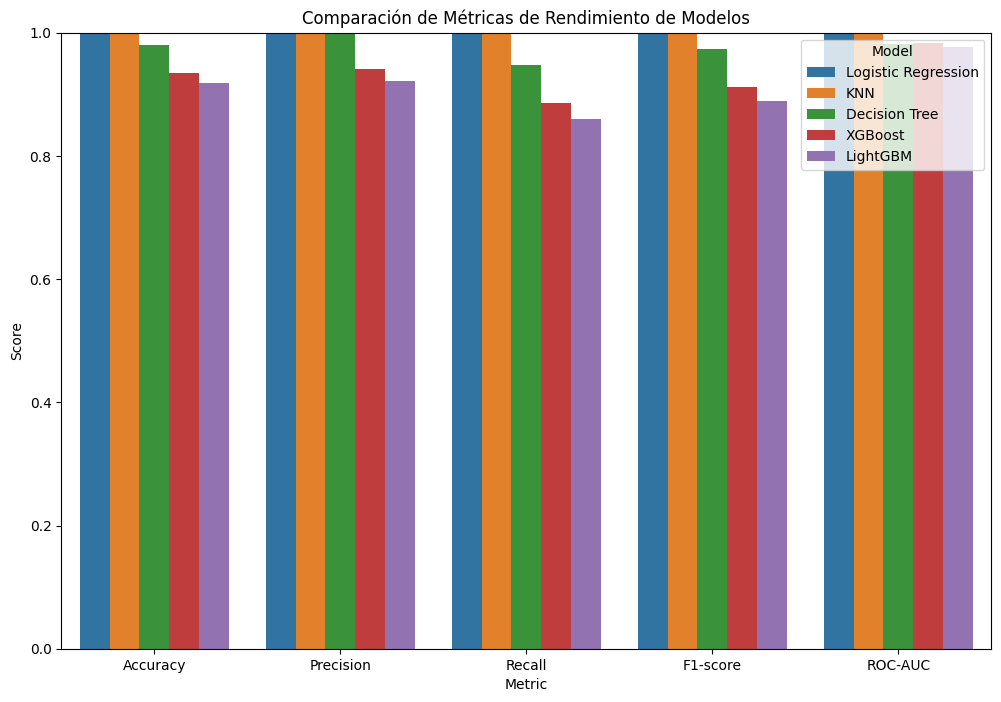

In [30]:
# Construir un DataFrame con las métricas para la comparación
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb],
    'LightGBM': [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm, roc_auc_lgbm]
})

print("\nComparación de Métricas de Rendimiento:")
display(comparison_df)

# Comparación usando gráfico bar plot
comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_df_melted)
plt.title('Comparación de Métricas de Rendimiento de Modelos')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

##Análisis de Resultados

Basándonos en la comparación de métricas de rendimiento, podemos observar lo siguiente:

* **Regresión Logística y KNN:** Ambos modelos muestran una precisión y recall del 1.0000 en el conjunto de entrenamiento después de la optimización de hiperparámetros. Esto podría indicar un sobreajuste (overfitting) a los datos de entrenamiento. Si estos modelos no generalizan bien a datos no vistos, su rendimiento en el conjunto de prueba podría ser significativamente menor.

* **Árbol de Decisión:** Este modelo tiene un alto Accuracy (0.9798) y Precision (1.0000), pero un Recall ligeramente menor (0.9474) en comparación con la Regresión Logística y KNN. El ROC-AUC (0.9817) es alto, lo que sugiere una buena capacidad para distinguir entre las clases.

* **XGBoost:** Este modelo muestra un buen rendimiento general con un Accuracy de 0.9349 y un ROC-AUC de 0.9839 (el más alto entre los modelos). Las métricas de Precision (0.9410) y Recall (0.8860) son equilibradas. XGBoost es un algoritmo de boosting conocido por su buen rendimiento en una amplia gama de problemas.

* **LightGBM:** Similar a XGBoost, LightGBM es otro algoritmo de boosting eficiente. Tiene un Accuracy de 0.9181 y un ROC-AUC de 0.9764. Sus métricas de Precision (0.9216) y Recall (0.8596) son ligeramente inferiores a las de XGBoost en el conjunto de entrenamiento.

##**Conclusión:**

Si bien la Regresión Logística y KNN muestran métricas perfectas en el conjunto de entrenamiento, es probable que estén sobreajustados. El Árbol de Decisión tiene un buen rendimiento, especialmente en precisión. Sin embargo, XGBoost parece ser el modelo más prometedor para este dataset en base a las métricas de evaluación en el conjunto de entrenamiento, particularmente el alto ROC-AUC y el buen equilibrio entre Precision y Recall.